# 네이버 뉴스 데이터로 텍스트분류하기 (tf-idf vs lstm)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 17.1 MB/s 
     |████████████████████████████████| 453 kB 54.6 MB/s 


In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 2.58 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-09-15 00:18:38--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bb

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

## 1.데이터 불러오기

In [ ]:
csv_path = './news_data.csv'

In [ ]:
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


## 2.데이터 정제

In [ ]:
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1       동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2       황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3       귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4       서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                              ...                        
5244    신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...
5245    는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...
5246    머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...
5247    가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...
5248    이미지제공게티이미지뱅크 이미지제공게티이미지뱅크  전자신문  전자신문인터넷 무단전재 ...
Name: news, Length: 5249, dtype: object

In [ ]:
# null 값이 있는지 체크
df.isnull().values.any()

False

In [ ]:
# 중복된 샘플 제거 (drop_duplicate활용)
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 갯수 : ', len(df))

뉴스 기사의 갯수 :  3985


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_

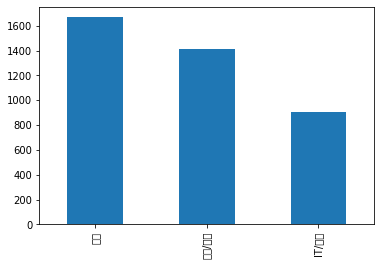

In [ ]:
df['code'].value_counts().plot(kind='bar')

In [ ]:
df.groupby('code').size().reset_index(name='count')

,code,count
0,IT/과학,903
1,사회,1668
2,생활/문화,1414


### 불용어 제거

In [ ]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [ ]:
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        temp_data = mecab.morphs(sentence)
        temp_data = [word for word in temp_data if not word in stopwords]
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))
    return text_data

In [ ]:
# df(df['news'])을 기준으로 불용어 제거하기.
text_data = np.array(preprocessing(df['news']))

In [ ]:
# text_data 출력하기
print(text_data[0])

파주 시청 사진제 공파 주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포


In [ ]:
print(len(text_data))

3985


## 3-1.TF-IDF 구현

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_data, df['code'], random_state=0)

In [ ]:
print('훈련용 뉴스 기사의 갯수 :', len(x_train))
print('테스트용 뉴스 기사의 갯수 : ', len(x_test))
print('훈련용 레이블의 갯수 :', len(y_train))
print('테스트용 레이블의 갯수 :', len(y_test))

훈련용 뉴스 기사의 갯수 : 2988
테스트용 뉴스 기사의 갯수 :  997
훈련용 레이블의 갯수 : 2988
테스트용 레이블의 갯수 : 997


In [ ]:
# DTM
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)

# TF-IDF 행렬
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [ ]:
# # DTM
# count_vect = CountVectorizer(max_features=1000)
# x_train_counts = count_vect.fit_transform(x_train)

# # TF-IDF 행렬
# tfidf_transformer = TfidfTransformer()
# x_train_tfidf = tfidf_transformer.fit(x_train_counts)

In [ ]:
x_train_counts.shape

(2988, 32030)

In [ ]:
type(x_train_counts)

scipy.sparse.csr.csr_matrix

In [ ]:
# 머신러닝 모델 학습 (나이브베이즈 모델)
clf = MultinomialNB().fit(x_train_tfidf, y_train)

In [ ]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

### 새로운 데이터로 테스트해보기

In [ ]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."           
])

In [ ]:
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [ ]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."  
])

In [ ]:
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


### 각 레이블별로 예측하기

In [ ]:
y_pred = clf.predict(tfidf_vectorizer(x_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.92      0.78      0.84       227
          사회       0.78      0.91      0.84       437
       생활/문화       0.84      0.74      0.79       333

    accuracy                           0.82       997
   macro avg       0.85      0.81      0.82       997
weighted avg       0.83      0.82      0.82       997



## 3-2.딥러닝(LSTM)으로 모델 설계

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
'''
Tokenizer를 만들고, 텍스트를 리스트화 시킨 후,
텍스트를 시퀀스 변환 후
시퀀스에서 패딩처리 진행
'''

tokenizer = Tokenizer(num_words = 1000) 
tokenizer.fit_on_texts(text_data)
data = tokenizer.texts_to_sequences(text_data)
padded = pad_sequences(data, padding = 'pre')

In [ ]:
label_original = np.array(list(df['code']))

In [ ]:
'''
텍스트라벨에 숫자인코딩으로 변환
'''
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(label_original)
label = encoder.transform(label_original)
# label 출력결과를 확인해보세요!
label

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
print(label.shape)

(3985,)


In [ ]:
'''
train data와 test data를 8:2로 분리
train data는 학습에 사용되지만, test data는 학습에 사용되지 않는다.
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded, label, test_size=0.2, shuffle=True, random_state=34)

In [ ]:
print(x_train.shape)

(3188, 4123)


In [ ]:
x_train

array([[  0,   0,   0, ..., 173,  35,  49],
       [  0,   0,   0, ..., 501,  35,  49],
       [  0,   0,   0, ...,  39,  35,  49],
       ...,
       [  0,   0,   0, ..., 217,  35,  49],
       [  0,   0,   0, ...,  91,  35,  49],
       [  0,   0,   0, ..., 307,  35,  49]], dtype=int32)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3188
797
3188
797


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

vocab_size = 4123
embedding_size = 16

model = Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_size, input_shape=(None,)))
# model.add(keras.layers.LSTM(64, return_sequences = True))
model.add(keras.layers.LSTM(32))
# model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, None, 16)          65968     
                                                                 
 lstm_29 (LSTM)              (None, 32)                6272      
                                                                 
 dense_43 (Dense)            (None, 32)                1056      
                                                                 
 dense_44 (Dense)            (None, 3)                 99        
                                                                 
Total params: 73,395
Trainable params: 73,395
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습의 진행
'''
loss는 y 라벨링이 one-hot이 아니고, 정수이기 때문에 sparse_categorical crossentropy를 사용
'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# epochs = 20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 
epochs = 100

history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks = [es], 
                    verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 273ms/step - loss: 1.0961 - accuracy: 0.3871 - val_loss: 1.0907 - val_accuracy: 0.4090
Epoch 2/100
7/7 [==============================] - 1s 197ms/step - loss: 1.0855 - accuracy: 0.4210 - val_loss: 1.0784 - val_accuracy: 0.4090
Epoch 3/100
7/7 [==============================] - 1s 201ms/step - loss: 1.0686 - accuracy: 0.4210 - val_loss: 1.0648 - val_accuracy: 0.4090
Epoch 4/100
7/7 [==============================] - 1s 200ms/step - loss: 1.0525 - accuracy: 0.4210 - val_loss: 1.0506 - val_accuracy: 0.4090
Epoch 5/100
7/7 [==============================] - 1s 199ms/step - loss: 1.0263 - accuracy: 0.4210 - val_loss: 1.0011 - val_accuracy: 0.4090
Epoch 6/100
7/7 [==============================] - 1s 199ms/step - loss: 0.9464 - accuracy: 0.4241 - val_loss: 0.9304 - val_accuracy: 0.4592
Epoch 7/100
7/7 [==============================] - 1s 202ms/step - loss: 0.9076 - accuracy: 0.5373 - val_loss: 0.8953 - val_accuracy: 0.5558
Epoch 8/100
7

### 테스트 데이터로 정확도 및 그래프그리기

In [ ]:
model.evaluate(x_test, y_test)[1]

25/25 [==============================] - 1s 55ms/step - loss: 0.5452 - accuracy: 0.8156


0.8155583143234253

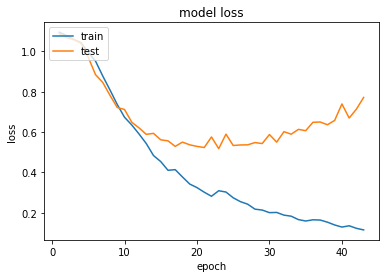

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()